In [1]:
# libraries to import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import seaborn as sns

In [6]:
random_number_generator = np.random.default_rng(1)

In [25]:
X = random_number_generator.normal(size = 100, scale = 1)

In [26]:
eps = random_number_generator.normal(size = 100, scale = 0.25)

In [27]:
Y = -1 + (0.5 * X) + eps

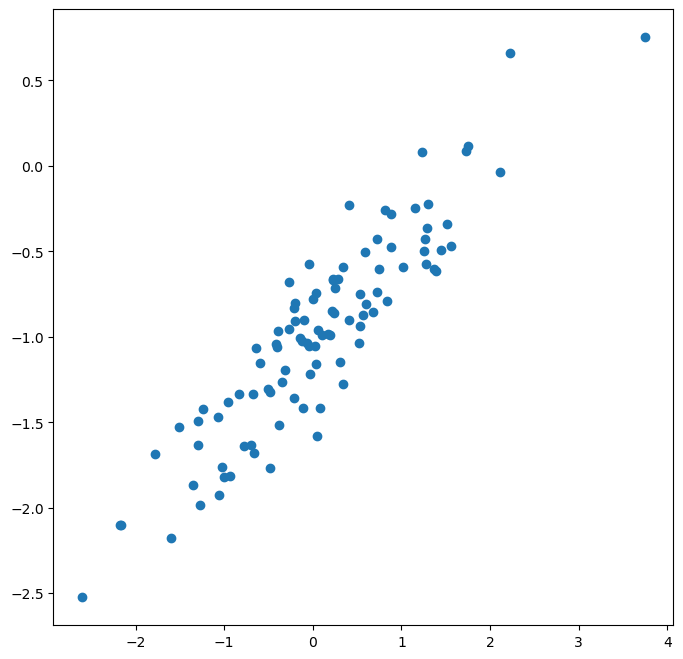

In [28]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(X, Y)

In [29]:
X_train = sm.add_constant(X)
model = sm.OLS(Y, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     482.6
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           1.22e-39
Time:                        09:22:24   Log-Likelihood:                0.44722
No. Observations:                 100   AIC:                             3.106
Df Residuals:                      98   BIC:                             8.316
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0190      0.024    -41.772      0.000      -1.067      -0.971
x1             0.5250      0.024     21.968      0.000       0.478       0.572
==============================================================================
Omnibus:                        1.753   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.330
Skew:                           0.024   Prob(JB):                        0.514
Kurtosis:                       2.437   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

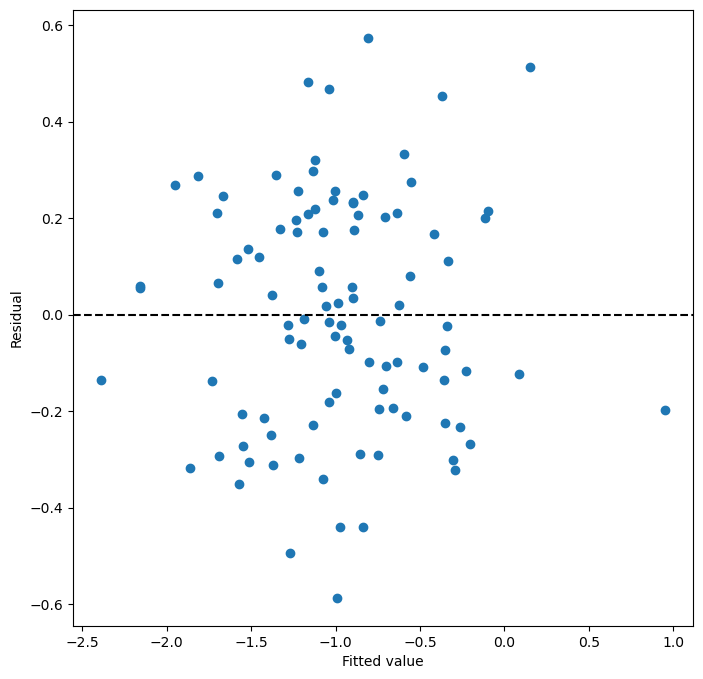

In [30]:
# residual plot
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

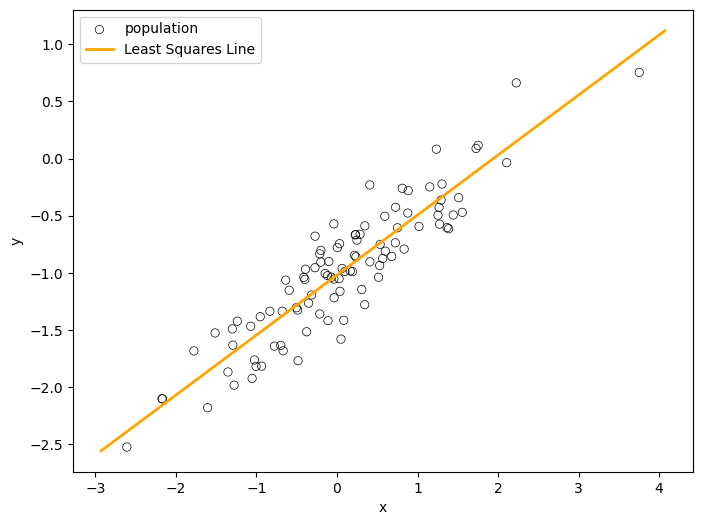

In [34]:
_, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, Y, marker='o', facecolors='none', edgecolors='black', linewidths=0.5, label='population')
ax.set_xlabel('x')
ax.set_ylabel('y')

intercept, slope = results.params
xlim = ax.get_xlim()
ylim = [intercept + xlim[0] * slope, intercept + xlim[1] * slope]
ax.plot(xlim, ylim, linewidth=2, color='orange', label='Least Squares Line')
ax.legend();

In [49]:
df = pd.DataFrame({'x': X, 'y': Y})
model_poly = smf.ols('y ~ x + I(x**2)', df).fit()
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     239.6
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           2.96e-38
Time:                        09:43:52   Log-Likelihood:                0.57980
No. Observations:                 100   AIC:                             4.840
Df Residuals:                      97   BIC:                             12.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0120      0.028    -35.923      0.000      -1.068      -0.956
x              0.5277      0.025     21.474      0.000       0.479       0.576
I(x ** 2)     -0.0070      0.014     -0.508      0.613      -0.034       0.020
==============================================================================
Omnibus:                        1.320   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                1.118
Skew:                           0.013   Prob(JB):                        0.572
Kurtosis:                       2.483   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
"""
the polynomial coefficient p value is high. not rejecting the hypothesis that polynomial of x improves the model accuracy
"""

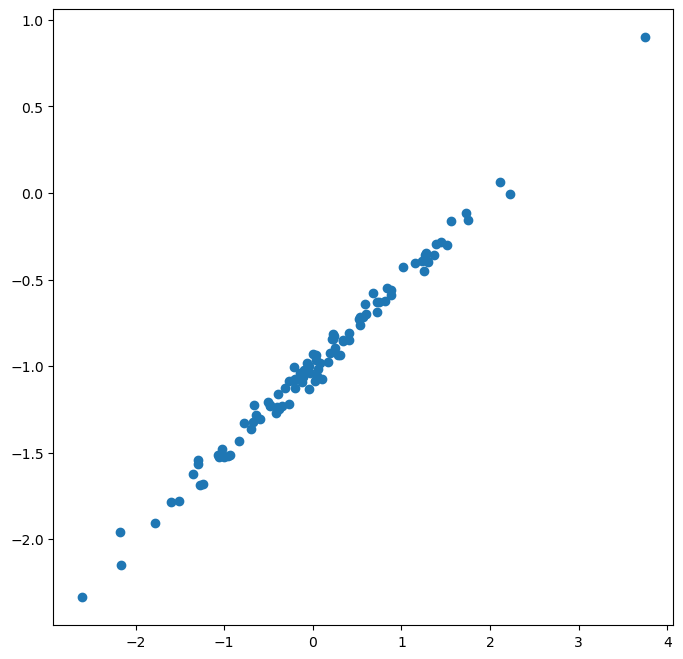

In [60]:
eps_less_noise = random_number_generator.normal(size = 100, scale = 0.05)
Y_less_noise = -1 + (0.5 * X) + eps_less_noise
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(X, Y_less_noise);

In [61]:
model_less_noise = sm.OLS(Y_less_noise, X_train)
results_less_noise = model_less_noise.fit()
results_less_noise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     9577.
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           1.52e-99
Time:                        10:00:36   Log-Likelihood:                 155.91
No. Observations:                 100   AIC:                            -307.8
Df Residuals:                      98   BIC:                            -302.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0024      0.005   -194.494      0.000      -1.013      -0.992
x1             0.4941      0.005     97.861      0.000       0.484       0.504
==============================================================================
Omnibus:                        0.778   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.820
Skew:                          -0.033   Prob(JB):                        0.664
Kurtosis:                       2.561   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

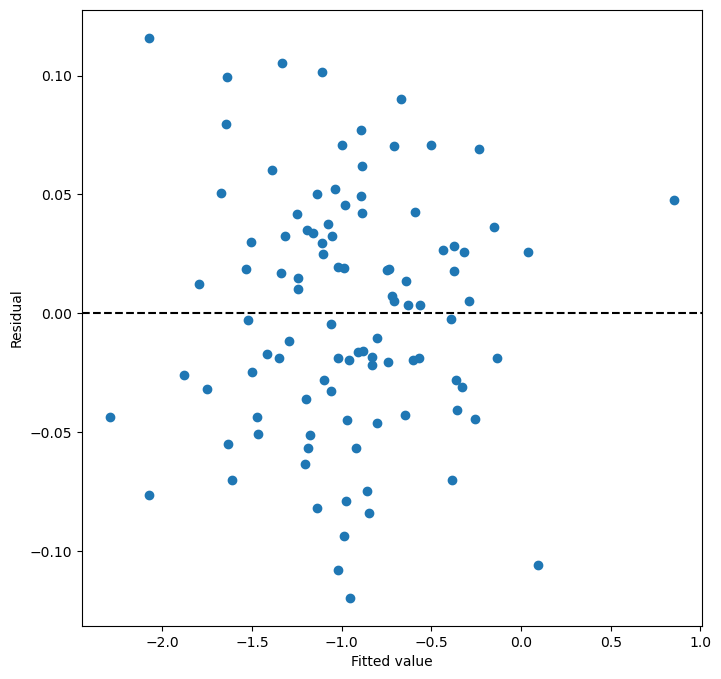

In [62]:
# residual plot
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results_less_noise.fittedvalues, results_less_noise.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

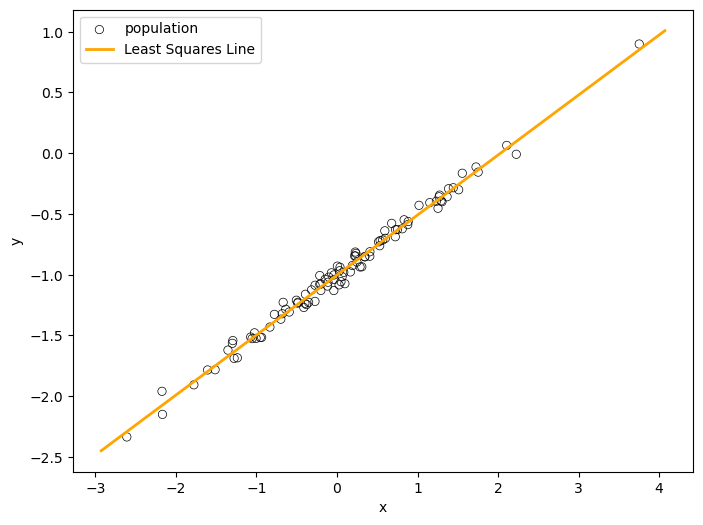

In [63]:
_, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, Y_less_noise, marker='o', facecolors='none', edgecolors='black', linewidths=0.5, label='population')
ax.set_xlabel('x')
ax.set_ylabel('y')

intercept, slope = results_less_noise.params
xlim = ax.get_xlim()
ylim = [intercept + xlim[0] * slope, intercept + xlim[1] * slope]
ax.plot(xlim, ylim, linewidth=2, color='orange', label='Least Squares Line')
ax.legend();

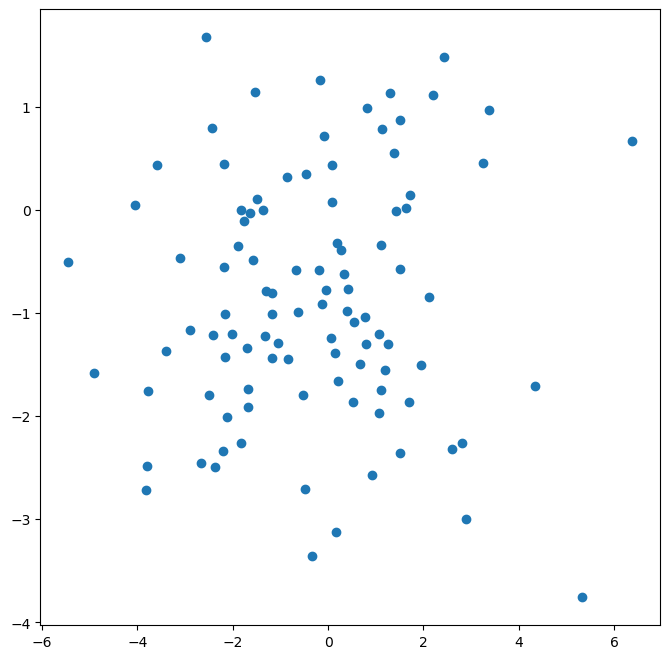

In [64]:
eps_more_noise = random_number_generator.normal(size = 100, scale = 1)
Y_more_noise = -1 + (0.5 * X) + eps_more_noise
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(X_more_noise, Y_more_noise);

In [65]:
model_more_noise = sm.OLS(Y_more_noise, X_train)
results_more_noise = model_more_noise.fit()
results_more_noise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     37.82
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           1.69e-08
Time:                        10:01:25   Log-Likelihood:                -141.74
No. Observations:                 100   AIC:                             287.5
Df Residuals:                      98   BIC:                             292.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9204      0.101     -9.102      0.000      -1.121      -0.720
x1             0.6092      0.099      6.150      0.000       0.413       0.806
==============================================================================
Omnibus:                        1.210   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                1.288
Skew:                           0.213   Prob(JB):                        0.525
Kurtosis:                       2.644   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

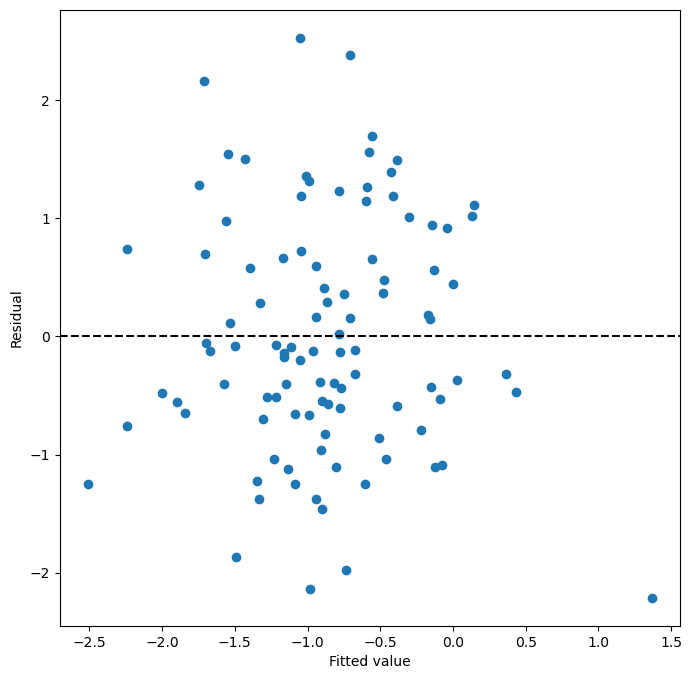

In [66]:
# residual plot
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results_more_noise.fittedvalues, results_more_noise.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

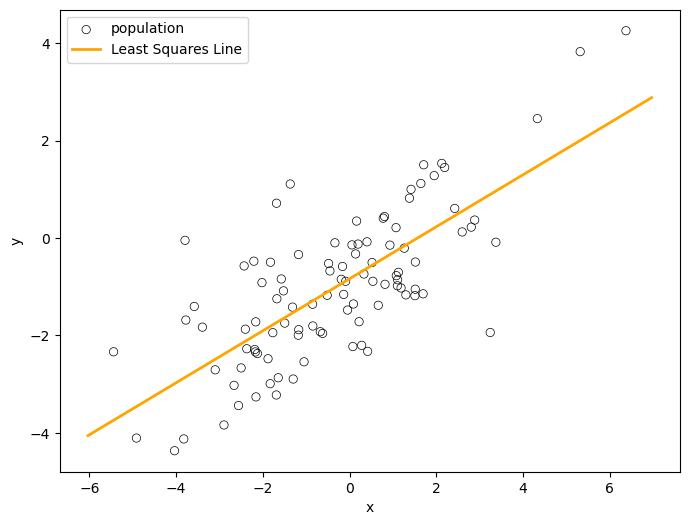

In [59]:
_, ax = plt.subplots(figsize=(8,6))
ax.scatter(X_more_noise, Y_more_noise, marker='o', facecolors='none', edgecolors='black', linewidths=0.5, label='population')
ax.set_xlabel('x')
ax.set_ylabel('y')

intercept, slope = results_more_noise.params
xlim = ax.get_xlim()
ylim = [intercept + xlim[0] * slope, intercept + xlim[1] * slope]
ax.plot(xlim, ylim, linewidth=2, color='orange', label='Least Squares Line')
ax.legend();

In [ ]:
"""
linear regression fits the less noisy data better
"""

In [69]:
results.conf_int(alpha=0.05)

array([[-1.06745317, -0.9706289 ],
       [ 0.4775697 ,  0.57242075]])

In [70]:
results_less_noise.conf_int(alpha=0.05)

array([[-1.01263726, -0.9921816 ],
       [ 0.48406959,  0.50410838]])

In [71]:
results_more_noise.conf_int(alpha=0.05)

array([[-1.12107228, -0.7197357 ],
       [ 0.41261991,  0.80577744]])

In [ ]:
"""
the confidence intervals are much thinner in the less noisy data
"""